# Google Dopamin on colab

In [1]:
!pip install --upgrade --no-cache-dir dopamine-rl
!pip install cmake
!pip install atari_py

    100% |████████████████████████████████| 71kB 2.6MB/s 
    100% |████████████████████████████████| 1.5MB 11.6MB/s 
    100% |████████████████████████████████| 1.0MB 17.7MB/s 
  Running setup.py install for gym ... - \ | done
    100% |████████████████████████████████| 17.7MB 1.4MB/s 
    100% |████████████████████████████████| 768kB 6.1MB/s 
  Running setup.py bdist_wheel for atari-py ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /root/.cache/pip/wheels

In [0]:
import numpy as np
import os
from dopamine.agents.dqn import dqn_agent
from dopamine.atari import run_experiment
from dopamine.colab import utils as colab_utils
from absl import flags

BASE_PATH = '/tmp/colab_dope_run'
GAME = 'Asterix'

In [0]:
LOG_PATH = os.path.join(BASE_PATH, 'basic_agent', GAME)

class BasicAgent(object):
  
  def __init__(self, sess, num_actions, switch_prob = 0.1):
    
    self._sess = sess
    self._num_actions = num_actions
    self._switch_prob = switch_prob
    self._last_action = np.random.randint(num_actions)
    self.eval_mode = False
    
    
  def _choose_action(self):
    if np.random.random() <= self._switch_prob:
      self._last_action = np.random.randint(self._num_actions)
    return self._last_action
    

  def bundle_and_checkpoint(self, unused_checkpoint_dir, unused_iteration):
    pass
    

  def unbundle(self, unused_checkpoint_dir, unused_checkpoint_version,
               unused_data):
    pass
  

  def begin_episode(self, unused_observation):
    return self._choose_action()
  

  def end_episode(self, unused_reward):
    pass
  

  def step(self, reward, observation):
    return self._choose_action()
    
    
def create_basic_agent(sess, environment):
  return BasicAgent(sess, num_actions=environment.action_space.n,
                     switch_prob=0.2)

basic_runner = run_experiment.Runner(LOG_PATH,
                                      create_basic_agent,
                                      game_name=GAME,
                                      num_iterations=200,
                                      training_steps=10,
                                      evaluation_steps=10,
                                      max_steps_per_episode=100)

In [25]:
basic_runner.run_experiment()
print('done training')

INFO:tensorflow:Beginning training...
INFO:tensorflow:Starting iteration 0
INFO:tensorflow:Average undiscounted return per training episode: 100.00
INFO:tensorflow:Average training steps per second: 707.15
INFO:tensorflow:Average undiscounted return per evaluation episode: 50.00
INFO:tensorflow:Starting iteration 1
INFO:tensorflow:Average undiscounted return per training episode: 50.00
INFO:tensorflow:Average training steps per second: 732.35
INFO:tensorflow:Average undiscounted return per evaluation episode: 50.00
INFO:tensorflow:Starting iteration 2
INFO:tensorflow:Average undiscounted return per training episode: 100.00
INFO:tensorflow:Average training steps per second: 716.23
INFO:tensorflow:Average undiscounted return per evaluation episode: 50.00
INFO:tensorflow:Starting iteration 3
INFO:tensorflow:Average undiscounted return per training episode: 100.00
INFO:tensorflow:Average training steps per second: 717.57
INFO:tensorflow:Average undiscounted return per evaluation episode: 5

In [0]:
!gsutil -q -m cp -R gs://download-dopamine-rl/preprocessed-benchmarks/* /content/
experimental_data = colab_utils.load_baselines('/content')

In [29]:
basic_data = colab_utils.read_experiment(log_path=LOG_PATH, verbose=True)
basic_data['agent'] = 'BasicAgent'
basic_data['run_number'] = 1
experimental_data[GAME] = experimental_data[GAME].merge(basic_data,
                                                        how='outer')


Reading statistics from: /tmp/colab_dope_run/basic_agent/Asterix//logs/log_199


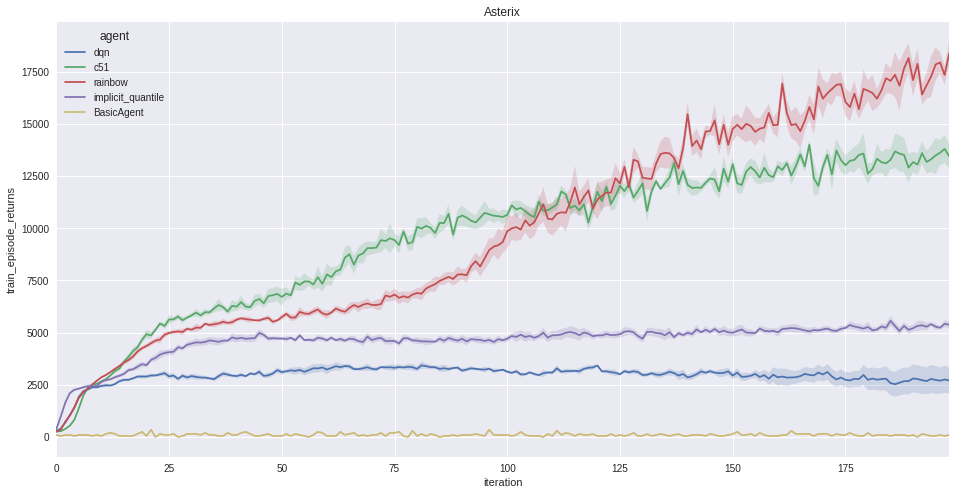

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
sns.tsplot(data=experimental_data[GAME], time='iteration', unit='run_number',
           condition='agent', value='train_episode_returns', ax=ax)
plt.title(GAME)
plt.show()
